In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, BatchNormalization

2024-02-01 15:46:00.620503: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-01 15:46:00.620607: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-01 15:46:00.811804: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
train = keras.utils.image_dataset_from_directory(
    directory="/kaggle/input/dogs-vs-cats/dogs_vs_cats/train",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256,256))

Found 20000 files belonging to 2 classes.


In [4]:
test = keras.utils.image_dataset_from_directory(
    directory="/kaggle/input/dogs-vs-cats/dogs_vs_cats/test",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256,256))

Found 5000 files belonging to 2 classes.


In [5]:
# Normalisation of pixel values
def process(image, label):
    image = tf.cast(image/255, tf.float32)
    return image, label

train_ds = train.map(process)
test_ds = test.map(process)

In [6]:
# CNN Model
model = Sequential()

model.add(Conv2D(32,kernel_size = (3,3), padding = 'valid', activation = 'relu', input_shape = (256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2),padding = 'valid', strides= 2))

model.add(Conv2D(64,kernel_size = (3,3), padding = 'valid', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2),padding = 'valid', strides= 2))

model.add(Conv2D(128,kernel_size = (3,3), padding = 'valid', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2),padding = 'valid', strides= 2))

model.add(Flatten())

model.add(Dense(128,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(64,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(1,activation = 'sigmoid'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [8]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [9]:
history = model.fit(train_ds,epochs = 10, validation_data =test_ds, batch_size = 8)

Epoch 1/10


I0000 00:00:1706802409.017268     106 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


625/625 [==============================] - 74s 100ms/step - loss: 0.6140 - accuracy: 0.6734 - val_loss: 0.5841 - val_accuracy: 0.6848
Epoch 2/10
625/625 [==============================] - 60s 96ms/step - loss: 0.4635 - accuracy: 0.7822 - val_loss: 0.4883 - val_accuracy: 0.7662
Epoch 3/10
625/625 [==============================] - 59s 94ms/step - loss: 0.3690 - accuracy: 0.8393 - val_loss: 0.6836 - val_accuracy: 0.6262
Epoch 4/10
625/625 [==============================] - 59s 94ms/step - loss: 0.2813 - accuracy: 0.8821 - val_loss: 0.4949 - val_accuracy: 0.7818
Epoch 5/10
625/625 [==============================] - 59s 94ms/step - loss: 0.2065 - accuracy: 0.9160 - val_loss: 0.4590 - val_accuracy: 0.8332
Epoch 6/10
625/625 [==============================] - 59s 94ms/step - loss: 0.1798 - accuracy: 0.9291 - val_loss: 0.5769 - val_accuracy: 0.7928
Epoch 7/10
625/625 [==============================] - 59s 94ms/step - loss: 0.1160 - accuracy: 0.9562 - val_loss: 0.5178 - val_accuracy: 0.8238
Ep

In [18]:
from PIL import Image
import requests
from io import BytesIO
import cv2

image_url = "https://images6.fanpop.com/image/photos/35800000/Puppy-dogs-35894603-1920-1200.jpg"

response = requests.get(image_url)
dog = Image.open(BytesIO(response.content))

img_dog = cv2.cvtColor(np.array(dog), cv2.COLOR_RGB2BGR)

resized_img_dog = cv2.resize(img_dog, (256, 256))
reshaped_img_dog = resized_img_dog.reshape((1, 256, 256, 3))

In [17]:
image_url = "https://t4.ftcdn.net/jpg/00/97/58/97/360_F_97589769_t45CqXyzjz0KXwoBZT9PRaWGHRk5hQqQ.jpg"

response = requests.get(image_url)
cat = Image.open(BytesIO(response.content))

img_cat = cv2.cvtColor(np.array(cat), cv2.COLOR_RGB2BGR)

resized_img_cat = cv2.resize(img_cat, (256, 256))
 
reshaped_img_cat = resized_img_cat.reshape((1, 256, 256, 3))

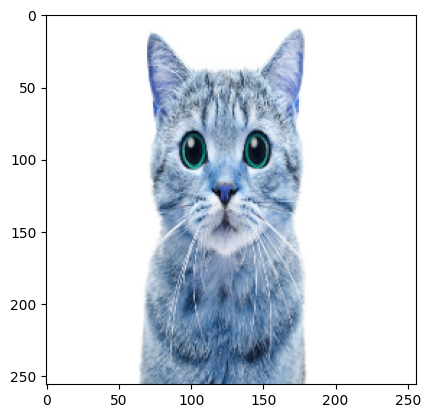

In [20]:
plt.imshow(resized_img_cat)

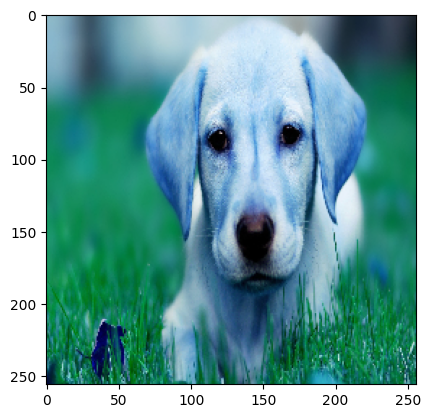

In [21]:
plt.imshow(resized_img_dog)

In [23]:
model.predict(reshaped_img_cat)

1/1 [==============================] - 0s 460ms/step


array([[0.]], dtype=float32)

In [24]:
model.predict(reshaped_img_dog)

1/1 [==============================] - 0s 18ms/step


array([[1.]], dtype=float32)